<a href="https://colab.research.google.com/github/Itsdevanand/NLP/blob/main/Amazon%20Product%20Review%20Scrapping%20and%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
i = 1

title = []
rating = []
content = []

for i in range(1,21):
    
  url="https://www.amazon.in/Test-Exclusive_2020_1153-Multi-3GB-Storage/product-reviews/B089MSK43J/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=" + str(i)
  response = requests.get(url)
  soup = bs(response.text,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all('div', {'data-hook':'review'})
  for item in reviews:
    #t = item.find('a', {'data-hook': 'review-title'}).text.strip()
    #r = item.find('i', {'data-hook' : 'review-star-rating'}).text
    c = item.find('span', {'data-hook': 'review-body'}).text.strip()
    #title.append(t) #list for stroing all review titles
    #rating.append(r) #list for solving all ratings
    content.append(c) #list for storing all contents
    

In [3]:
with open("mi.txt","w",encoding='utf8') as output:
    output.write(str(content))
    
review_full = " ".join(content)

In [4]:
import nltk
# from nltk.corpus import stopwords



fromated_text = re.sub("[^A-Za-z" "]+"," ", review_full).lower()
fromated_text = re.sub("[0-9" "]+"," ", fromated_text)
#Cleaning the text
fromated_text = fromated_text.replace('Your browser does not support HTML5 video.', ' ')

In [10]:
import nltk
nltk.download('stopwords')

# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
words = fromated_text.split(" ")    
nltk.download('punkt')
from nltk import word_tokenize

print(stop_words)
stop_words.extend(["Mi","mobile","time","android","phone","device","screen","battery","product","good","day","price"] )
stop_words.extend(['xiaomi','redmi','note'])

sentence_words = word_tokenize(fromated_text) # Tokenize the sentence
print(sentence_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 

In [13]:

# Filtering stop words from the input string
fromated_text = ' '.join([word for word in sentence_words if word not in stop_words]) 
print(fromated_text)


words1 = word_tokenize(fromated_text)

two major issues overheating issue network issue display camera build quality overall happy due heating issue network issue heating issue irritates lot unable use min amazing value money one point g one change years efficient camera saturates colour slightly always little problem samsung camera used overall details multimedia experience great dual stereo speakers hz samoled display also amazing one thing sure money wasted buy performs design awesome camera quality also also charges quickly amoled display main highlight performs marvelous best point update guys purchase handset issues fixed update bro listen carefully days usage editing review star star really failed software dept gets warm without usage use use normal myntra paytm kind app gets warm recent update draining fast means great messing new devices ruin every providing buggy update last least display flicker issue yes kind annoying thing every users facing including sad verdict planning buy handset think twice buying honest g

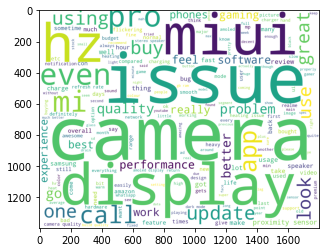

In [14]:
# unigram word cloud
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(fromated_text)

plt.imshow(wordcloud_ip)

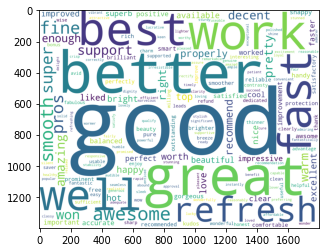

In [15]:
with open(r"/content/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

# Positive word cloud
# Choosing the only words which are present in positive words
pos_wrds = " ".join ([w for w in sentence_words if w in poswords])

wordcloud_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(pos_wrds)
plt.figure(2)
plt.imshow(wordcloud_pos)

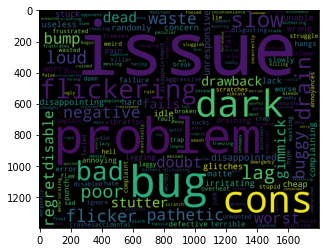

In [16]:
# negative words Choose path for -ve words stored in system
with open(r"/content/negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

# negative word cloud
# Choosing the only words which are present in negwords
neg_words = " ".join ([w for w in sentence_words if w in negwords])

wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(neg_words)
plt.figure(3)
plt.imshow(wordcloud_neg)
